<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/team%202/Grp_Alrite_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title - EDA on The Exportation of Plantation in Sarawak   <a href="https://colab.research.google.com/drive/1Hb54DkyUD0bTf5Id9YDp8UgKptd1rKAc?usp=sharingscrollTo=EP-X34iHu-aS" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we are going to do an exploratory data analysis of the Property Listings in Kuala Lumpur. We have found from https://www.data.gov.my/data/ms_MY/dataset/pengeluaran-tanaman-buah-mengikut-daerah-di-sarawak

We wish to compare the compare the residential property price in Kuala Lumpur.between different locations.

The technique/tool used we used in this EDA such as:

*   pandas
*   scipy
*   numpy
*   scikit-learn
*   matplotlib.pyplot
*   seaborn

**Group Members:**
1. **CHONG KAI ZHE A20EC0186**
2. **RASMIN KAUR SANDHU A19ET0216**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2015 Hingga 2021 Pengeluaran Tanaman Buah Daerah.csv')
df

,Tahun,Daerah,Butiran,Komoditi,Sub Komoditi,Kuantiti atau Nilai
0,2015,Kuching,Luas Bertanam ha,Buah,Belimbing,0.1
1,2015,Kuching,Luas Berhasil ha,Buah,Belimbing,0.1
2,2015,Kuching,Pengeluaran Mt,Buah,Belimbing,0.1
3,2016,Kuching,Luas Bertanam ha,Buah,Belimbing,0.1
4,2016,Kuching,Luas Berhasil ha,Buah,Belimbing,0.1
...,...,...,...,...,...,...
14148,2020,Siburan,Luas Berhasil ha,Buah,Tembikai,NaN
14149,2020,Siburan,Pengeluaran Mt,Buah,Tembikai,NaN
14150,2021,Siburan,Luas Bertanam ha,Buah,Tembikai,NaN
14151,2021,Siburan,Luas Berhasil ha,Buah,Tembikai,NaN


In [ ]:
df.dropna(inplace=True)
df

,Tahun,Daerah,Butiran,Komoditi,Sub Komoditi,Kuantiti atau Nilai
0,2015,Kuching,Luas Bertanam ha,Buah,Belimbing,0.1
1,2015,Kuching,Luas Berhasil ha,Buah,Belimbing,0.1
2,2015,Kuching,Pengeluaran Mt,Buah,Belimbing,0.1
3,2016,Kuching,Luas Bertanam ha,Buah,Belimbing,0.1
4,2016,Kuching,Luas Berhasil ha,Buah,Belimbing,0.1
...,...,...,...,...,...,...
11049,2016,Pakan,Luas Berhasil ha,Buah,Nangka,"9,005.00"
11050,2016,Pakan,Pengeluaran Mt,Buah,Nangka,"9,362.10"
11051,2017,Pakan,Luas Bertanam ha,Buah,Nangka,"10,817.50"
11052,2017,Pakan,Luas Berhasil ha,Buah,Nangka,"13,766.10"


This is to drop any missing values in the dataset

---



In [ ]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  11054
Number of Columns:  6


This displays the total number of rows and columns

In [ ]:
result=df.dtypes
print(result)

Tahun                     int64
Daerah                   object
Butiran                  object
Komoditi                 object
Sub Komoditi             object
 Kuantiti atau Nilai     object
dtype: object


This shows the data types of each columns

In [ ]:
df[' Kuantiti atau Nilai ']=pd.to_numeric(df[' Kuantiti atau Nilai '],errors='coerce')

Since the data type of the kuantiti column is object , we have to change it to numerical in order to be able to do calculations

In [ ]:
mean_kuantiti = df[' Kuantiti atau Nilai '].mean()
Sum=df[' Kuantiti atau Nilai '].sum()
print(mean_kuantiti)
print(Sum)

76.34597796908267
824765.6000000001


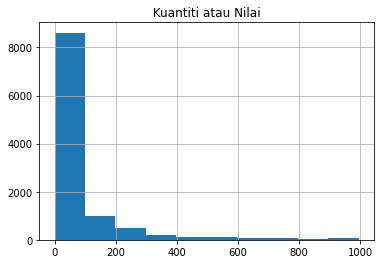

In [ ]:
df.hist(column=' Kuantiti atau Nilai ');

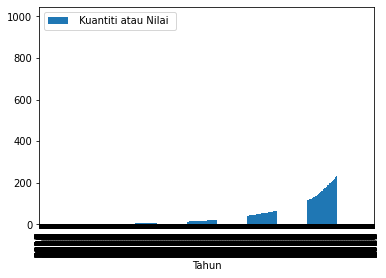

In [ ]:
bargraph = df.plot.bar(x = 'Tahun', y = ' Kuantiti atau Nilai ')

This shows the relationship between the years and the amount

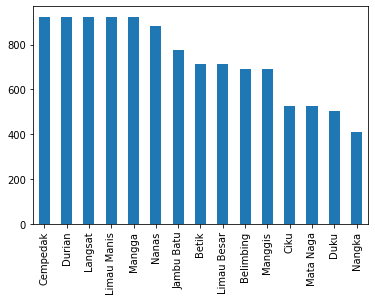

In [ ]:
df['Sub Komoditi'].value_counts().plot(kind='bar')

This shows the amount of each type of commodities. We can see that nangka has the least. 

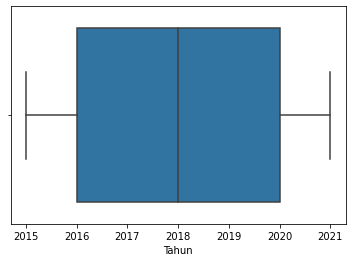

In [ ]:
 sns.boxplot(x=df['Tahun'])

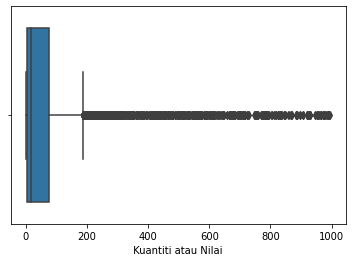

In [ ]:
sns.boxplot(x=df[' Kuantiti atau Nilai '])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Tahun                     4.0
 Kuantiti atau Nilai     73.0
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-15-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(9756, 6)

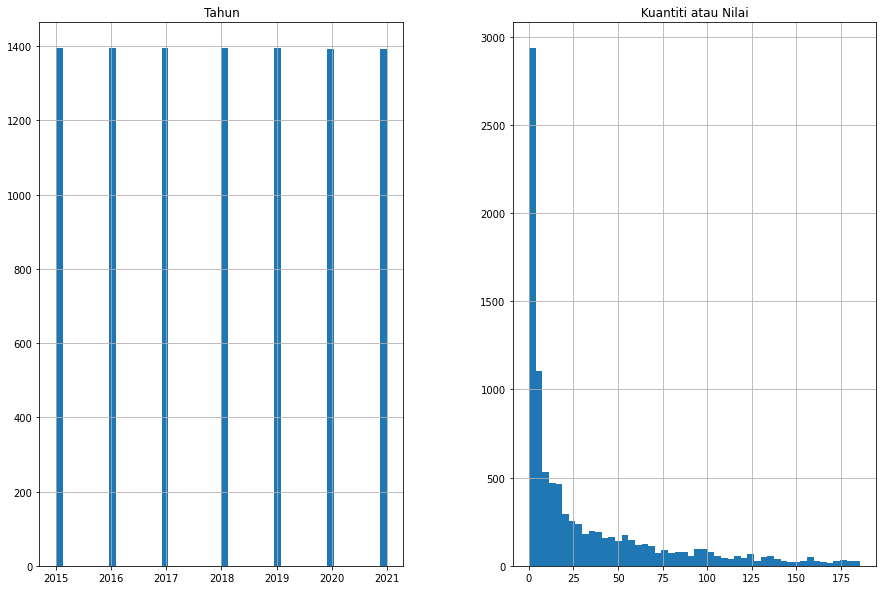

In [ ]:
df.hist(bins=50, figsize=(15,10))
plt.show()

Text(0.5, 0, 'Tahun')

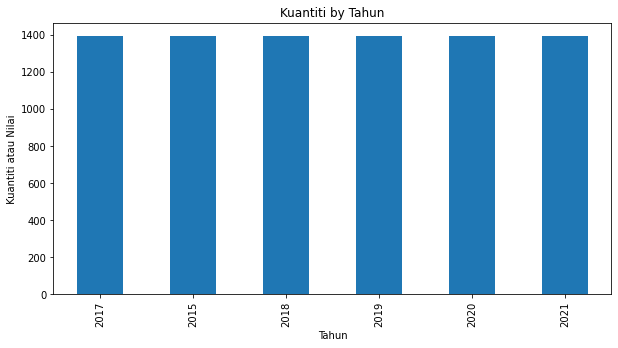

In [ ]:
df.Tahun.value_counts().nlargest(40)[1:].plot(kind='bar', figsize=(10,5))
plt.title("Kuantiti by Tahun")
plt.ylabel(' Kuantiti atau Nilai ')
plt.xlabel('Tahun')

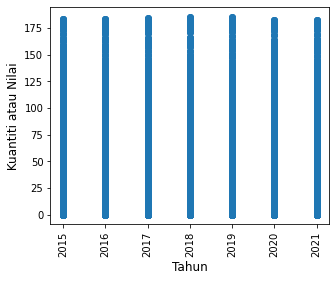

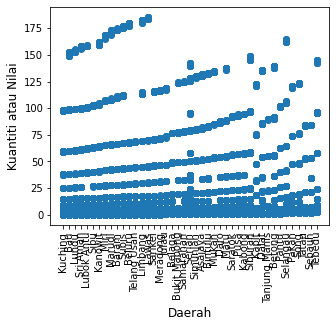

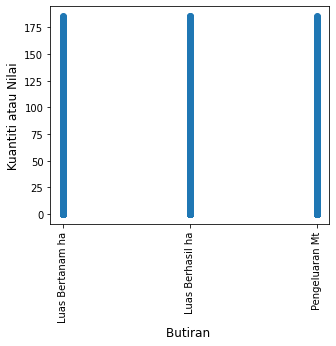

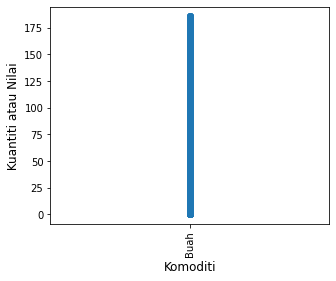

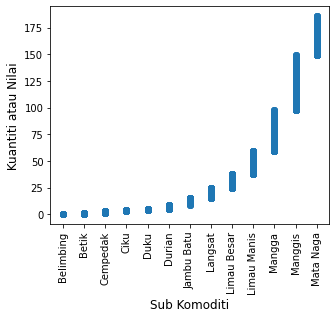

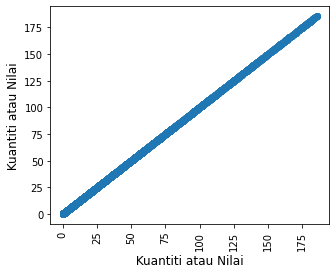

In [ ]:
for feature_name in df.columns:
    plt.figure(figsize=(5, 4));
    plt.scatter(df[feature_name], df[' Kuantiti atau Nilai ']);
    plt.ylabel(' Kuantiti atau Nilai ', size=12);
    plt.xlabel(feature_name, size=12);
    plt.xticks(rotation=90)
    
plt.show();

,Tahun,Kuantiti atau Nilai
Tahun,1.000000,-0.000327
Kuantiti atau Nilai,-0.000327,1.000000


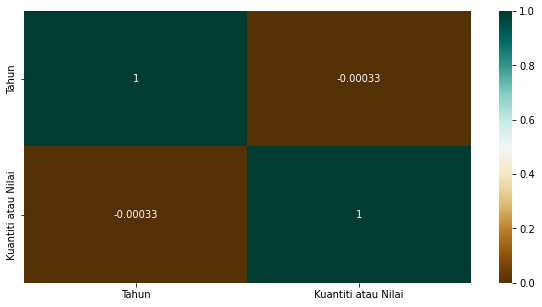

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

1) In Sub Komoditi, which fruit has the highest frequancy

In [ ]:
count = df['Sub Komoditi'].value_counts()
print(count)

Cempedak       924
Durian         924
Langsat        924
Limau Manis    924
Mangga         924
Jambu Batu     777
Betik          714
Limau Besar    714
Belimbing      693
Manggis        693
Ciku           525
Duku           503
Mata Naga      266
Nangka         251
Name: Sub Komoditi, dtype: int64


Text(0.5, 0, 'Sub Komditi')

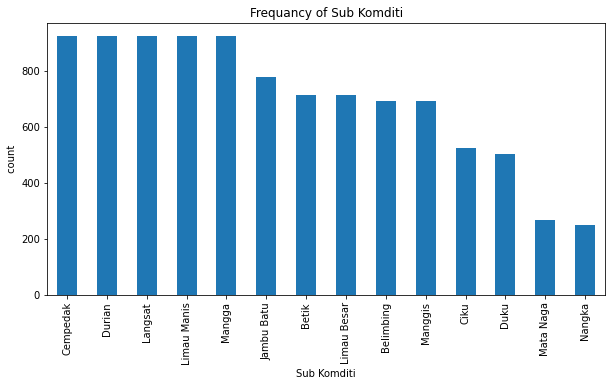

In [ ]:
df['Sub Komoditi'].value_counts().nlargest(40)[0:].plot(kind='bar', figsize=(10,5))
plt.title("Frequancy of Sub Komditi")
plt.ylabel(' count ')
plt.xlabel('Sub Komditi')

Cempedak, Durian, Langsat , Limau Manis and Mangga has the highest frequency 

2) In which year Sarawak has the highest number and the lowest number of Kuantiti.

In [ ]:
df.loc[df[' Kuantiti atau Nilai '].idxmax()]


Tahun                                2018
Daerah                              Lawas
Butiran                  Luas Berhasil ha
Komoditi                             Buah
Sub Komoditi                    Mata Naga
 Kuantiti atau Nilai                185.6
Name: 9501, dtype: object

In [ ]:
df.loc[df[' Kuantiti atau Nilai '].idxmin()]

Tahun                                2015
Daerah                            Kuching
Butiran                  Luas Bertanam ha
Komoditi                             Buah
Sub Komoditi                    Belimbing
 Kuantiti atau Nilai                  0.1
Name: 0, dtype: object

The result shows that Lawas has the most amount of fruit, 185.6 in the year 2018 and Kuching has the least amount of fruit, 0.1 in the year 2015.

3) In Sarawak, what is the frequancy of each Daerah for the contribution of exporting fruit.

In [ ]:
count = df['Daerah'].value_counts()
print(count)

Serian           504
Limbang          294
Miri             294
Subis            294
Sri Aman         273
Sarikei          273
Lawas            266
Kanowit          262
Matu             252
Bau              252
Julau            252
Kuching          252
Lundu            252
Baram            252
Marudi           252
Beluru           231
Meradong         231
Selangau         231
Siburan          231
Simunjan         231
Asajaya          231
Bintulu          231
Saratok          231
Betong           210
Kapit            210
Pusa             210
Telang Usan      210
Daro             210
Lubok Antu       210
Samarahan        210
Bukit Mabong     210
Sibu             210
Pakan            198
Mukah            189
Kabong           189
Dalat            189
Belaga           189
Tebedu           168
Pantu            147
Song             147
Tanjung Manis    126
Tatau            126
Sebauh           126
Name: Daerah, dtype: int64


This shows the frequency of exporting fruit for each area in Sarawak. We can see that Serian has exported fruit the most.

Text(0.5, 0, 'Daerah')

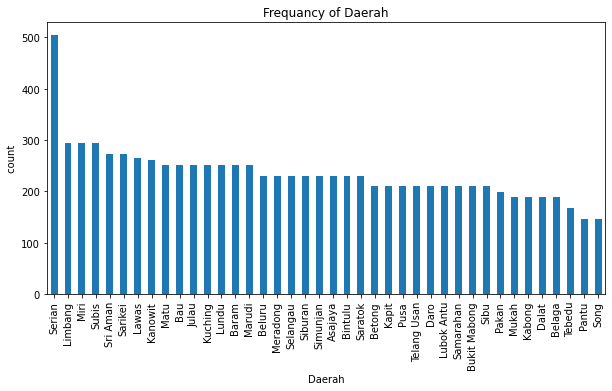

In [ ]:
df['Daerah'].value_counts().nlargest(40)[0:].plot(kind='bar', figsize=(10,5))
plt.title("Frequancy of Daerah")
plt.ylabel(' count ')
plt.xlabel('Daerah')

4) what are the elements for Butiran Komoditi

In [ ]:
df['Butiran '].unique()


array(['Luas Bertanam ha', 'Luas Berhasil ha', 'Pengeluaran Mt'],
      dtype=object)

In [ ]:
df['Komoditi'].unique()

array(['Buah'], dtype=object)

5) Which Daerah brings the positive effect to Sarawak in terms of Kuantiti atau Nilai

In [ ]:
Daerah = df.groupby('Daerah').sum()
Daerah

,Tahun,Kuantiti atau Nilai
Daerah,,
Asajaya,466158,7244.4
Baram,508536,9598.0
Bau,508536,8558.0
Belaga,381402,3591.7
Beluru,466158,7475.1
Betong,423780,7844.8
Bintulu,466158,7422.8
Bukit Mabong,423780,6637.4
Dalat,381402,7485.0


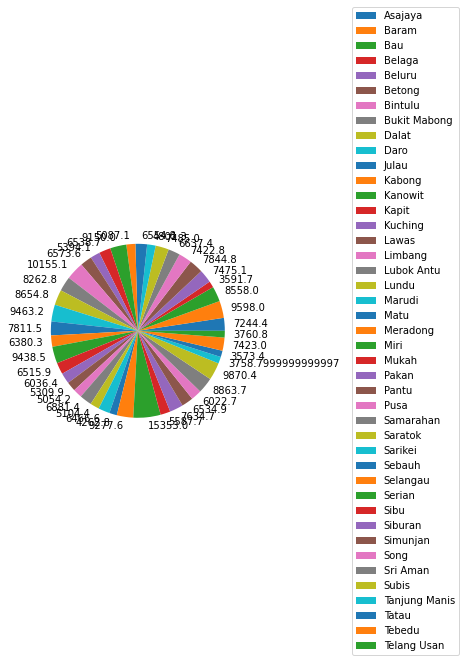

In [ ]:
plt.pie(Daerah[' Kuantiti atau Nilai '], labels=Daerah[' Kuantiti atau Nilai '])
plt.legend(Daerah.index, loc='right', bbox_to_anchor=(2,0.5))
plt.show()

##Inference and Conclusion**

**Inferences:** Sarawak has been exporting fruit since 2015, There are total of 43 Daerah has been working of the exportation of fruit. Among all the daerah, Serian has been exported the most fruit, with the total of 15353 of fruit being exported. In the dataset, we also discover that Sarawak has only exported fruit as the main source.

**Conclusion**
In this dataset, we have discover that Serian has been exported the most fruit throughtout Sarawak. Not only that, Cempedak, Durian, Langsat , Limau Manis and Mangga has the highest frequency for the exportation.

## References and Future Work

References: https://stackoverflow.com/questions/71516740/how-to-convert-object-data-type-into-int64-in-python